# Bilayer Gap vs Temperature Calculation
This file simulates the Al/Ti bilayer discussed in
[Zhao et al. 2018](https://doi.org/10.1088/1361-6668/aad788) and determines the
temperature dependence of the gap energy.

We start with the standard import statements. (matplotlib is not a requirement
for this library, so it must be installed separately for this notebook to run).

In [1]:
import numpy as np
from scipy.constants import e
from matplotlib import pyplot as plt
from superconductivity.gap_functions import delta_bcs
from superconductivity.multilayer import Stack, Superconductor

To define a bilayer, we need the thickness, transition temperature,
Debye temperature, diffusion constant, and resistivity for each layer. These
numbers are taken from the paper.

We pick a thickness of 100 nm for each layer as an example, and in this paper,
the boundary resistance is taken to be zero.

In [2]:
# Ti parameters
# thickness [m]
d_ti = 100e-9
# transition temperature [K]
tc_ti = 0.55
# Debye temperature [K]
td_ti = 426
# diffusion constant [m^2 / s]
dc_ti = 1.5
# resistivity [Ohm m]
rho_ti = 1 / 5.88 * 1e-6

# Al parameters
# thickness [m]
d_al = 100e-9
# transition temperature [K]
tc_al = 1.2
# Debye temperature [K]
td_al = 423
# diffusion constant [m^2 / s]
dc_al = 35
# resistivity [Ohm m]
rho_al = 1 / 132 * 1e-6

# Other parameters
# boundary resistance [Ohm m^2]
rb = 0.0
# temperature [K]
min_t = min(tc_al, tc_ti) / 10
max_t = max(tc_al, tc_ti)
t = np.linspace(min_t, max_t, 100)

The simulation is done by first creating the superconductor objects, setting
some simulation parameters, adding them to a stack object. The temperatures
can then be reset before computing the energy gap. Because the layer
thicknesses are small, the energy gap is the same everywhere in the stack, so
we only take one value as representative of the film.

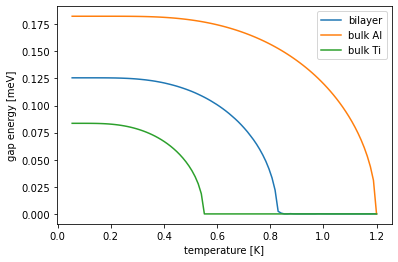

In [3]:
# Define the superconductors.
al = Superconductor(d_al, rho_al, t[0], td_al, tc_al, dc_al)
ti = Superconductor(d_ti, rho_ti, t[0], td_ti, tc_ti, dc_ti)

# Add the superconductors to a stack.
stack = Stack([al, ti], rb)

# Loop over the temperatures.
figure, axes = plt.subplots()
gap = np.zeros(len(t))
for ii, tii in enumerate(t):
    # Set the new temperature.
    stack.t = tii

    # Do the simulation.
    stack.update_order()
    stack.update_gap()

    # Save the gap energy (same for all layers and positions).
    gap[ii] = stack.layers[0].gap[0]

# Plot the results.
axes.plot(t, gap / e * 1e3, label="bilayer")
axes.plot(t, delta_bcs(t, tc_al) / e * 1e3, label='bulk Al')
axes.plot(t, delta_bcs(t, tc_ti) / e * 1e3, label='bulk Ti')
axes.set_xlabel("temperature [K]")
axes.set_ylabel("gap energy [meV]")
axes.legend();

The gap energy vs Tc curve follows the same functional form as the bulk BCS
values. Therefore, we can use the ∆0 = 1.764 * k * Tc formula to calculate Tc
from the zero temperature energy gap.